## Decision Tree Scratch

In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

In [2]:
data = pd.read_csv("titanic.csv")

In [3]:
data.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [5]:
columns_to_drop = ['PassengerId','Name','Ticket','Cabin','Embarked']

data_cl = data.drop(columns_to_drop, axis=1)

In [6]:
data_cl.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,0,3,male,22.0,1,0,7.2500
1,1,1,female,38.0,1,0,71.2833
2,1,3,female,26.0,0,0,7.9250
3,1,1,female,35.0,1,0,53.1000
4,0,3,male,35.0,0,0,8.0500


In [7]:
le = LabelEncoder()

data_cl["Sex"] = le.fit_transform(data_cl["Sex"])

# male = 1, female = 0

In [8]:
data_cl.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,0,3,1,22.0,1,0,7.2500
1,1,1,0,38.0,1,0,71.2833
2,1,3,0,26.0,0,0,7.9250
3,1,1,0,35.0,1,0,53.1000
4,0,3,1,35.0,0,0,8.0500


In [9]:
data_cl.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 7 columns):
Survived    891 non-null int64
Pclass      891 non-null int64
Sex         891 non-null int64
Age         714 non-null float64
SibSp       891 non-null int64
Parch       891 non-null int64
Fare        891 non-null float64
dtypes: float64(2), int64(5)
memory usage: 48.8 KB


In [10]:
data_cl = data_cl.fillna(data_cl["Age"].mean())

In [11]:
data_cl.describe()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,0.647587,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,0.477990,13.002015,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,0.000000,22.000000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,1.000000,29.699118,0.000000,0.000000,14.454200
75%,1.000000,3.000000,1.000000,35.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,1.000000,80.000000,8.000000,6.000000,512.329200


In [12]:
data_cl.loc[2]

Survived     1.000
Pclass       3.000
Sex          0.000
Age         26.000
SibSp        0.000
Parch        0.000
Fare         7.925
Name: 2, dtype: float64

In [13]:
input_cols = ['Pclass','Sex','Age','SibSp', 'Parch', 'Fare']
output_col = ['Survived']

X = data_cl[input_cols]
y = data_cl[output_col]

print (X.shape, y.shape)
print (type(X))

((891, 6), (891, 1))
<class 'pandas.core.frame.DataFrame'>


In [14]:
def entropy(col):
    
    counts = np.unique(col, return_counts=True)
    N = float(col.shape[0])
    
    ent = 0.0
    
    for ix in counts[1]:
        f = ix / N
        ent += (-1.0*f*np.log2(f))
    return ent

In [15]:
def divide_data(x_data, fkey, fval):
    x_right = pd.DataFrame([], columns=x_data.columns)
    x_left = pd.DataFrame([],columns=x_data.columns)
    
    for ix in range(x_data.shape[0]):
        val = x_data[fkey].loc[ix]
        
        if val > fval:
            x_right = x_right.append(x_data.loc[ix])
        else:
            x_left = x_left.append(x_data.loc[ix])
    
    return x_left,x_right

In [16]:
x_left,x_right = divide_data(data_cl[:10], 'Sex', 0.5)

In [17]:
x_left

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
1,1.0,1.0,0.0,38.0,1.0,0.0,71.2833
2,1.0,3.0,0.0,26.0,0.0,0.0,7.9250
3,1.0,1.0,0.0,35.0,1.0,0.0,53.1000
8,1.0,3.0,0.0,27.0,0.0,2.0,11.1333
9,1.0,2.0,0.0,14.0,1.0,0.0,30.0708


In [18]:
x_right

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,0.0,3.0,1.0,22.000000,1.0,0.0,7.2500
4,0.0,3.0,1.0,35.000000,0.0,0.0,8.0500
5,0.0,3.0,1.0,29.699118,0.0,0.0,8.4583
6,0.0,1.0,1.0,54.000000,0.0,0.0,51.8625
7,0.0,3.0,1.0,2.000000,3.0,1.0,21.0750


In [19]:
def information_gain(x_data, fkey, fval):
    
    left,right = divide_data(x_data, fkey,fval)
    
    l = float(left.shape[0])/x_data.shape[0]
    r = float(right.shape[0])/x_data.shape[0]
    
    if left.shape[0] == 0 or right.shape[0] == 0:
        return -10000
    
    return entropy(x_data.Survived) - (l*entropy(left.Survived) + r*entropy(right.Survived))    

In [20]:
for fx in X.columns:
    print (fx)
    print (information_gain(data_cl, fx, data_cl[fx].mean()))

Pclass
0.07579362743608165
Sex
0.2176601066606142
Age
0.0008836151229467681
SibSp
0.009584541813400071
Parch
0.015380754493137916
Fare
0.042140692838995464


In [21]:
class DecisionTree:
    
    def __init__(self, depth=0,max_depth=5):
        self.left = None
        self.right = None
        self.fkey = None
        self.fval = None
        self.max_depth = max_depth
        self.depth = depth
        self.target = None
        
    def train(self, X_train):
        print (self.depth, "$"*10)
        
        features = ['Pclass','Sex','Age','SibSp', 'Parch', 'Fare']
        info_gains = []
        
        for ix in features:
            info_gains.append(information_gain(X_train,ix, X_train[ix].mean()))
        
        self.fkey = features[np.argmax(info_gains)]
        self.fval = X_train[self.fkey].mean()
        
        data_left,data_right = divide_data(X_train, self.fkey,self.fval)
        data_left = data_left.reset_index(drop=True)
        data_right = data_right.reset_index(drop=True)
        
        if data_left.shape[0] == 0 or data_right.shape[0] == 0:
            if X_train.Survived.mean() >= 0.5:
                self.target = "Survived"
            else:
                self.target = "Dead"
            return
        
        if self.depth >= self.max_depth:
            if X_train.Survived.mean() >= 0.5:
                self.target = "Survived"
            else:
                self.target = "Dead"
            return
        
        self.left = DecisionTree(depth=self.depth+1, max_depth=self.max_depth)
        self.left.train(data_left)
        
        self.right = DecisionTree(depth=self.depth+1, max_depth=self.max_depth)
        self.right.train(data_right)
        
        if X_train.Survived.mean() >= 0.5:
            self.target = "Survived"
        else:
            self.target = "Dead"
        return
        
        
    def predict(self,test):
        if test[self.fkey] > self.fval:
            if self.right is None:
                return self.target
            return self.right.predict(test)
        else:
            if self.left is None:
                return self.target
            return self.left.predict(test)

In [100]:
split = int(0.70*data_cl.shape[0])
train_data = data_cl[:split]
test_data = data_cl[split:]
test_data = test_data.reset_index(drop=True)

In [101]:
dt = DecisionTree()

In [102]:
dt.train(train_data)

(0, '$$$$$$$$$$')
(1, '$$$$$$$$$$')
(2, '$$$$$$$$$$')
(3, '$$$$$$$$$$')
(4, '$$$$$$$$$$')
(5, '$$$$$$$$$$')
(5, '$$$$$$$$$$')
(4, '$$$$$$$$$$')
(5, '$$$$$$$$$$')
(5, '$$$$$$$$$$')
(3, '$$$$$$$$$$')
(4, '$$$$$$$$$$')
(5, '$$$$$$$$$$')
(5, '$$$$$$$$$$')
(4, '$$$$$$$$$$')
(5, '$$$$$$$$$$')
(5, '$$$$$$$$$$')
(2, '$$$$$$$$$$')
(3, '$$$$$$$$$$')
(4, '$$$$$$$$$$')
(5, '$$$$$$$$$$')
(5, '$$$$$$$$$$')
(4, '$$$$$$$$$$')
(5, '$$$$$$$$$$')
(5, '$$$$$$$$$$')
(3, '$$$$$$$$$$')
(4, '$$$$$$$$$$')
(5, '$$$$$$$$$$')
(5, '$$$$$$$$$$')
(4, '$$$$$$$$$$')
(5, '$$$$$$$$$$')
(5, '$$$$$$$$$$')
(1, '$$$$$$$$$$')
(2, '$$$$$$$$$$')
(3, '$$$$$$$$$$')
(4, '$$$$$$$$$$')
(5, '$$$$$$$$$$')
(5, '$$$$$$$$$$')
(4, '$$$$$$$$$$')
(5, '$$$$$$$$$$')
(5, '$$$$$$$$$$')
(3, '$$$$$$$$$$')
(4, '$$$$$$$$$$')
(5, '$$$$$$$$$$')
(5, '$$$$$$$$$$')
(4, '$$$$$$$$$$')
(5, '$$$$$$$$$$')
(5, '$$$$$$$$$$')
(2, '$$$$$$$$$$')
(3, '$$$$$$$$$$')
(4, '$$$$$$$$$$')
(5, '$$$$$$$$$$')
(5, '$$$$$$$$$$')
(4, '$$$$$$$$$$')
(5, '$$$$$$$$$$')
(5, '$$$$$

In [103]:
print (dt.fkey, dt.fval)

('Sex', 0.6292134831460674)


In [104]:
print (dt.left.fkey, dt.left.fval)
print (dt.right.fkey, dt.right.fval)

('Pclass', 2.1774891774891776)
('Fare', 25.149456377551026)


In [105]:
print (dt.left.left.fkey, dt.left.left.fval)
print (dt.left.right.fkey, dt.left.right.fval)

('Age', 31.151548861480073)
('Parch', 0.6822429906542056)


In [106]:
print (dt.right.left.fkey, dt.right.left.fval)
print (dt.right.right.fkey, dt.right.right.fval)

('Parch', 0.08745247148288973)
('Pclass', 1.5271317829457365)


In [107]:
y_pred = []
for ix in range(test_data.shape[0]):
    y_pred.append(dt.predict(test_data.loc[ix]))

In [109]:
y_pred[:10]

['Dead',
 'Dead',
 'Dead',
 'Dead',
 'Survived',
 'Dead',
 'Dead',
 'Dead',
 'Dead',
 'Dead']

In [110]:
y_actual = test_data[output_col]

In [111]:
le = LabelEncoder()
y_pred = le.fit_transform(y_pred)

In [112]:
y_pred[:10]

array([0, 0, 0, 0, 1, 0, 0, 0, 0, 0])

In [113]:
y_actual = np.array(y_actual)
y_pred = np.array(y_pred)

In [114]:
y_actual.shape

(268, 1)

In [116]:
y_pred = y_pred.reshape(-1,1)
print (y_pred.shape)

(268, 1)


In [117]:
float(np.sum(y_actual == y_pred))/y_pred.shape[0]

0.8171641791044776

## Decision Tree Sklearn

In [118]:
from sklearn.tree import DecisionTreeClassifier

In [119]:
skdt = DecisionTreeClassifier(criterion='entropy')

In [121]:
skdt.fit(train_data[input_cols], train_data[output_col])

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [122]:
skdt.score(test_data[input_cols],test_data[output_col])

0.7835820895522388

In [123]:
import pydotplus

from sklearn.externals.six import StringIO
from IPython.display import Image
from sklearn.tree import export_graphviz

In [124]:
dot_data = StringIO()
export_graphviz(skdt, out_file=dot_data, filled=True,rounded=True)

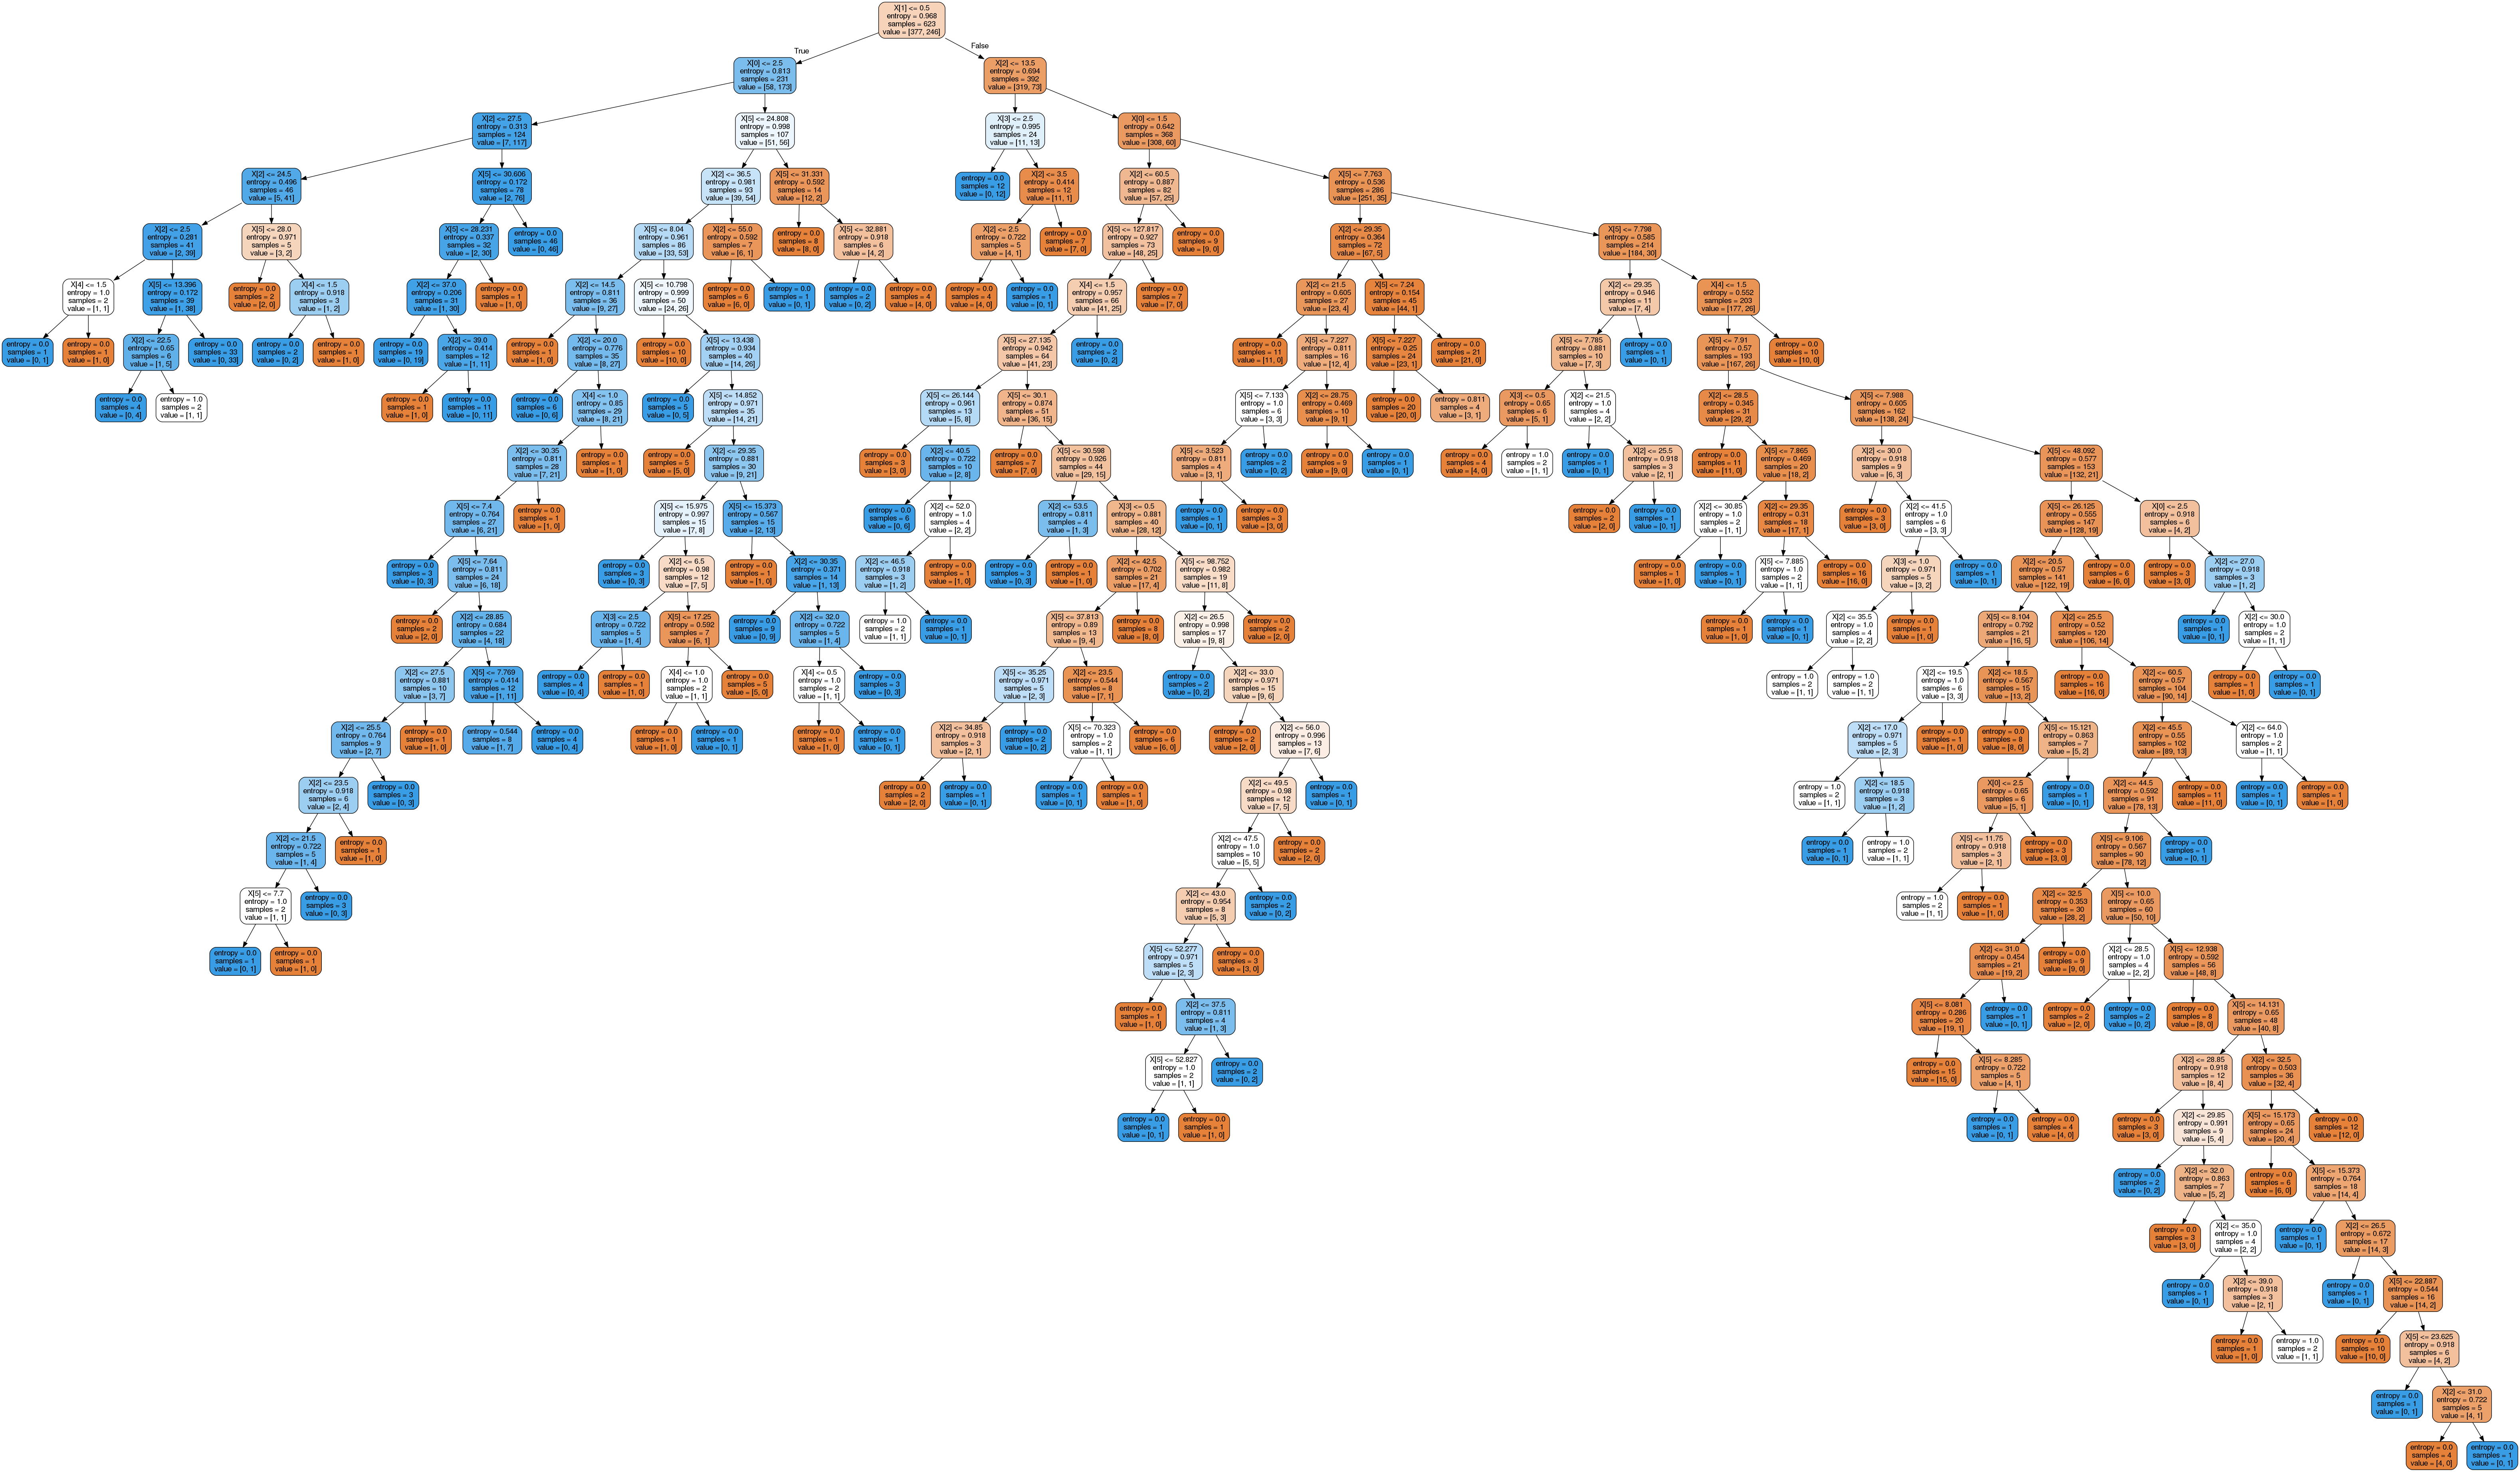

In [125]:
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())

## Random Forest

In [126]:
from sklearn.ensemble import RandomForestClassifier

In [129]:
rf = RandomForestClassifier(criterion='entropy')

In [130]:
rf.fit(train_data[input_cols], train_data[output_col])

/home/vasu/.local/lib/python2.7/site-packages/ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """Entry point for launching an IPython kernel.


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [131]:
rf.score(test_data[input_cols],test_data[output_col])

0.8208955223880597